In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Modulos para escalonado 
from sklearn.preprocessing import scale, MinMaxScaler

In [10]:
file = 'heart_failure_clinical_records_dataset.csv'
heart_df = pd.read_csv(file)
heart_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### Revisión de datos nulos y tipo de datos

In [11]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


NO existe presencia de datos nulos en esta muestra.


TODOS los datos son numéricos

### Revisión general del comportamiento de los datos 

Número total, media, desviasión estandar, mínimo, cuartiles, máximo

In [12]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Notemos que las columnas "anaemia", "diabetes", "high_blood_pressure", "sex", "smoking" y "DEATH_EVENT" tienen comportamiento de valores cualitativos binarios.

La información proporcionada en este dataset, nos dice que los 0 representan un NO y los 1 un SI

In [20]:
columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv', usecols=columns)

In [43]:
# Calcular el coeficiente de Fisher
def fisher(media, mediana, desviacion_estandar):
  coef_fisher = 3 * (media - mediana) / desviacion_estandar
  # Interpretación
  if coef_fisher < 0:
      return f"La distribución está sesgada negativamente.\nFischer = {round(coef_fisher, 4)}"
  elif coef_fisher > 0:
      return f"La distribución está sesgada positivamente.\nFischer = {round(coef_fisher, 4)}"
  else:
      return f"La distribución es simétrica.\nFischer = {round(coef_fisher, 4)}"


# Calcular el coeficiente de curtosis
def curtosis(coef_curtosis):
  # Interpretación
  if coef_curtosis > 0:
      return f"La distribución es leptocúrtica.\n(colas más pesadas y puntiaguda en el centro)\nCurtosis = {round(coef_curtosis, 4)}"
  elif coef_curtosis < 0:
      return f"La distribución es platicúrtica.\n(colas más ligeras y aplanada en el centro)\nCurtosis = {round(coef_curtosis, 4)}"
  else:
      return f"La distribución es mesocúrtica.\n(similar a la distribución normal)\nCurtosis = {round(coef_curtosis, 4)}"

def grafica(data, column, axs, i):
    colores = ['lightblue', 'lightgreen', 'lightcoral', 'lavender', 'lightsalmon', 'lightseagreen', 'lightsteelblue', 'lightgray', 'peachpuff']

    sns.boxplot(y=data[column], ax=axs[i, 0], color=colores[i])
    sns.histplot(data[column], ax=axs[i, 1], bins=30, kde=True, color=colores[i])

    # Fisher texto
    texto = fisher(data[column].mean(), data[column].median(), data[column].std())
    axs[i, 1].text(0.1, 0.8, texto, transform=axs[i, 1].transAxes, fontsize=9)
    
    # Curtosis texto
    texto = curtosis(data[column].kurtosis())
    axs[i, 1].text(0.1, 0.5, texto, transform=axs[i, 1].transAxes, fontsize=9)
    axs[i, 1].set_xlabel('')

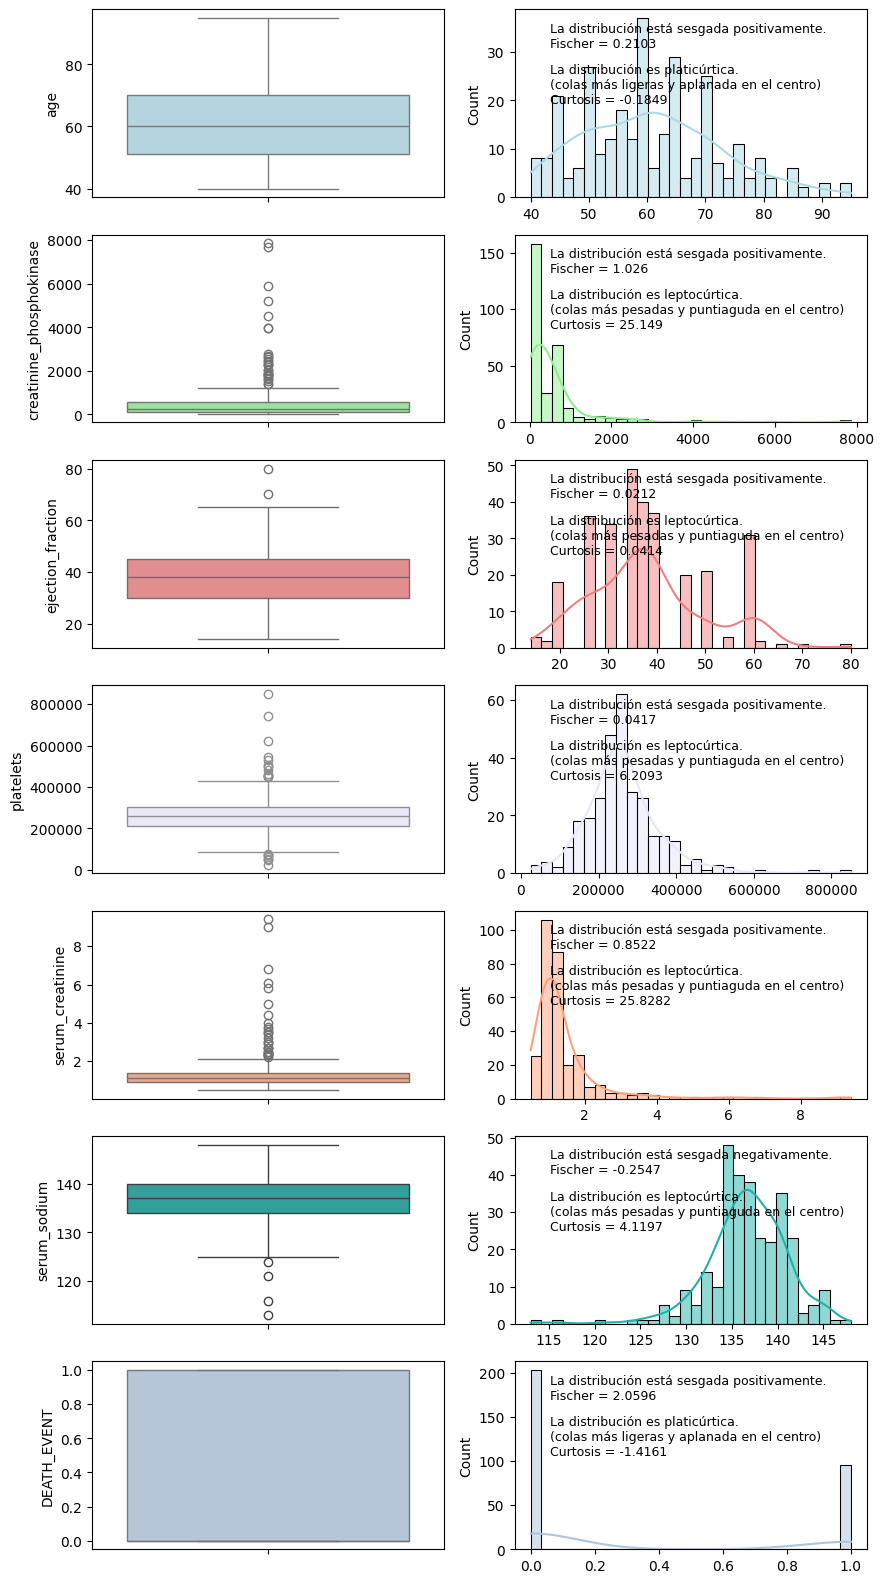

In [44]:
fig, axs = plt.subplots(7, 2, figsize=(10, 20))
i = 0

for column in heart_df.columns:
    grafica(heart_df, column, axs, i)
    i += 1

plt.show()

In [ ]:

# Cambiar los 1 y 0 por Si y No respectivamente de las variables cualitativas
sex = heart_df['sex'].replace( {1: 'Masculino', 0: 'Femenino'} )
heart_df['sex'] = sex
anaemia = heart_df['anaemia'].replace( {1: 'si', 0: 'no'} )
heart_df['anaemia'] = anaemia
diabetes = heart_df['diabetes'].replace( {1: 'Si', 0: 'No'} )
heart_df['diabetes'] = diabetes
high_blood_pressure = heart_df['high_blood_pressure'].replace( {1: 'Si', 0: 'No'} )
heart_df['high_blood_pressure'] = high_blood_pressure
smoking = heart_df['smoking'].replace( {1: 'Si', 0: 'No'} )
heart_df['smoking'] = smoking
DEATH_EVENT = heart_df['DEATH_EVENT'].replace( {1: 'Si', 0: 'No'} )
heart_df['DEATH_EVENT'] = DEATH_EVENT

# Revisar si tiene valores NAN (valores nulos)
for column in heart_df:
  heart_df[column].fillna('')

# En este caso eliminar duplicados no aplica

# Valores enteros a la edad
heart_df['age'] = heart_df['age'].apply(int)